<a href="https://colab.research.google.com/github/Rojan116/AI_works/blob/master/table_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

PATH = os.getcwd()
img_path = PATH +'/images'

In [0]:
def show_Image(x):
  """This method display image since cv2.imshow is not suported by google colab"""
  plt.figure(figsize=(10,10))
  plt.imshow(x)

In [0]:
def find_verticle_line(img_gray):
  """"This function finds all the vertical line performing morpholigical operations"""
  kernel_length_v = (np.array(img_gray).shape[1])//120
  vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length_v)) 
  im_temp1 = cv2.erode(img_bin, vertical_kernel, iterations=3)
  vertical_lines_img = cv2.dilate(im_temp1, vertical_kernel, iterations=3)
  return vertical_lines_img


In [0]:
def find_horizontal_lines(img_gray):
  """"This function finds all the Horizontal line performing morpholigical operations"""
  kernel_length_h = (np.array(img_gray).shape[1])//40
  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length_h, 1))
  im_temp2 = cv2.erode(img_bin, horizontal_kernel, iterations=3)
  horizontal_lines_img = cv2.dilate(im_temp2, horizontal_kernel, iterations=3)
  return horizontal_lines_img

In [0]:
def find_table_segment(vertical_lines_img, horizontal_lines_img):
  """This Method finds the table segment by blending horizontal line and vertical line,
  perform morphological operation and threshold to fint table segments """
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  table_segment = cv2.addWeighted(vertical_lines_img, 0.5, horizontal_lines_img, 0.5, 0.0)
  table_segment = cv2.erode(cv2.bitwise_not(table_segment), kernel, iterations=2)
  thresh, table_segment = cv2.threshold(table_segment, 0, 255, cv2.THRESH_OTSU)
  return table_segment

In [0]:
def perform_contour_operations(x):
  """This methods finds countour and draw boundinmg box """
  contours, hierarchy = cv2.findContours(table_segment, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  count = 0
  table_info = []
  areas = []
  area_thresh=2000
  for c in contours:
      x, y, w, h = cv2.boundingRect(c)
      area = cv2.contourArea(c)
      # print(area)
      if(area>area_thresh):
        if (w > 80 and h > 20) and w > 3 * h:
            count += 1
            cropped = img[y:y + h, x:x + w]
            table_info.append([x,y,w,h])
            areas.append(area)
  return table_info,areas

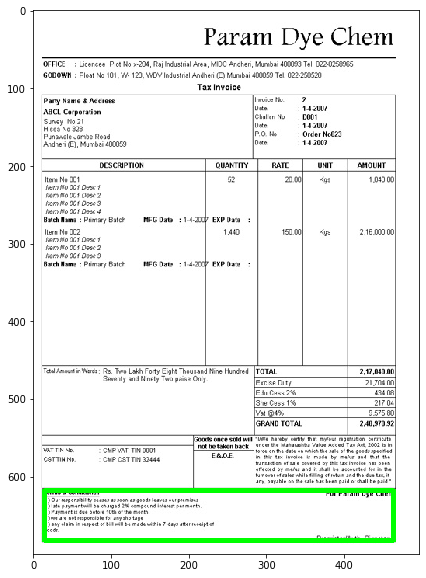

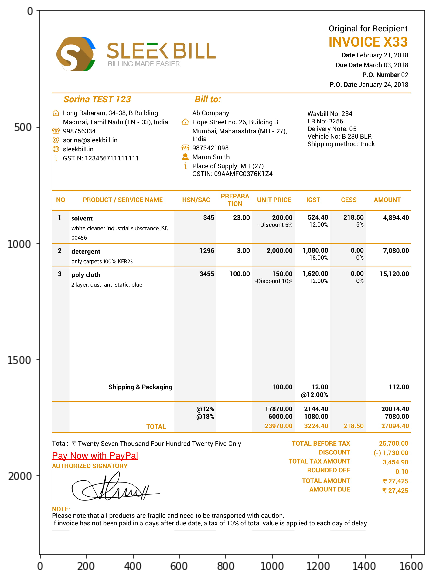

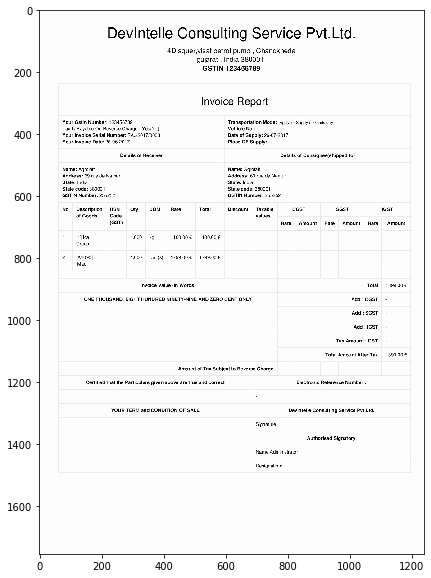

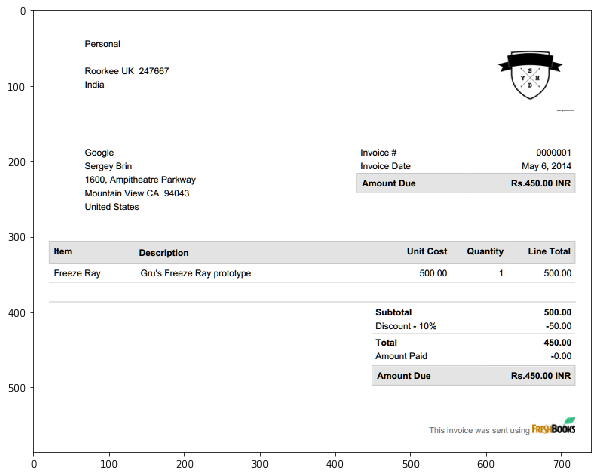

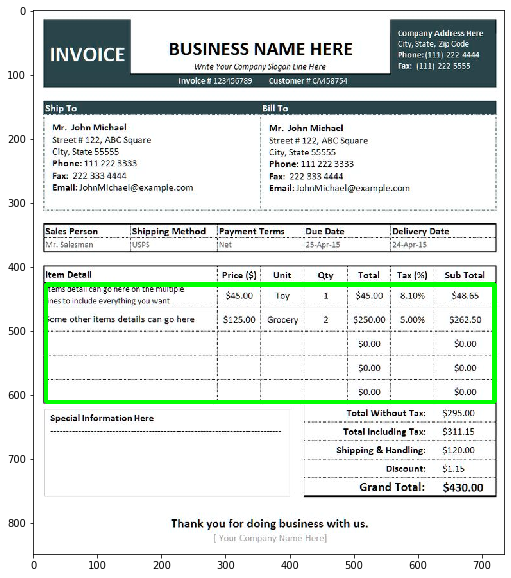

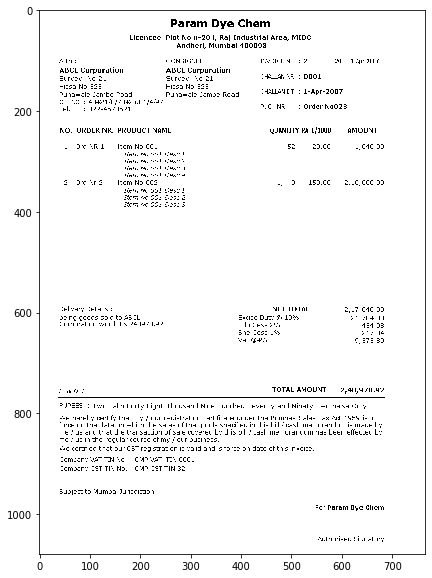

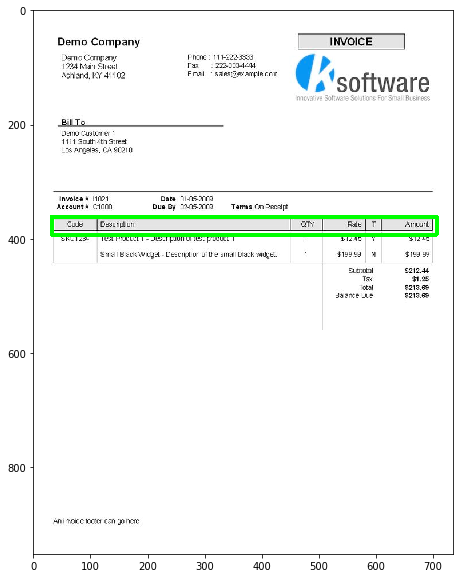

In [16]:
images = []
table_detected = {}
for img in os.listdir(img_path):
  if(img.endswith('jpg') or img.endswith('png')):
    images.append(img)

# print(images)
for im in images:
  img = cv2.imread(img_path + '/'+im) 
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  (thresh, img_bin) = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  img_bin = cv2.bitwise_not(img_bin)
  vertical_lines_img = find_verticle_line(img_gray)
  horizontal_lines_img = find_horizontal_lines(img_gray)
  table_segment = find_table_segment(vertical_lines_img,horizontal_lines_img)
  table_info,areas = perform_contour_operations(table_segment)
  max_area=0
  if len(areas) != 0:
    max_area = max(areas)
    for i in range(len(areas)):
      if(areas[i]==max_area):
        x,y,w,h = table_info[i]
        cv2.rectangle(img,(x, y),(x + w, y + h),(0, 255, 0), 5)
        table_detected[im]=[x,y,x+w,y+h]
  show_Image(img)



In [17]:
print("Table detected {}".format(table_detected))


Table detected {'4.jpg': [14, 618, 464, 682], '5.jpg': [20, 428, 719, 611], '1.jpg': [32, 361, 705, 393]}
